# Twitter Text Classification

## 1 Importing libraries

In [28]:
import re
import spacy
import random
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score


## 2 Loading the databases

- Kaggle Link: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

### Training database

- Negative label: 0
- Positive label: 1

In [29]:
training_database = pd.read_csv('../data/training/training_database.csv', delimiter=';')
training_database.shape

(50000, 5)

In [30]:
training_database.head(10)

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)
5,1050785368008781825,@KingJokerLeto mas amiga eu to aqui ainda :),Fri Oct 12 16:28:49 +0000 2018,1,:)
6,1050785350724014080,"@RivasJairo Bravo, Jairo!!! :)))",Fri Oct 12 16:28:44 +0000 2018,1,:)
7,1050785336551444480,@inquilinasls @Spotify socorro ksoaksosks acho...,Fri Oct 12 16:28:41 +0000 2018,1,:)
8,1050785297028603905,"@chimekarlla gosto muito de fazenda :) , mas m...",Fri Oct 12 16:28:32 +0000 2018,1,:)
9,1050785215235256320,Amanha vou ver venom :D,Fri Oct 12 16:28:12 +0000 2018,1,:)


In [31]:
training_database.tail(10)

,id,tweet_text,tweet_date,sentiment,query_used
49990,1046762888717914115,queria uma sogra :( kk,Mon Oct 01 14:04:55 +0000 2018,0,:(
49991,1046762873618399232,Eu to tão triste de ficar essa semana toda sem...,Mon Oct 01 14:04:51 +0000 2018,0,:(
49992,1046762866995605504,Acabei de ouvir no rádio :( https://t.co/rj0lk...,Mon Oct 01 14:04:50 +0000 2018,0,:(
49993,1046762844279238657,Sdds dos tempos e da galera que não volta mais :(,Mon Oct 01 14:04:44 +0000 2018,0,:(
49994,1046762837496848386,@luciannasouzafe kkkkkkkkkkkkkkkkkkkkkkkkkkk a...,Mon Oct 01 14:04:43 +0000 2018,0,:(
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


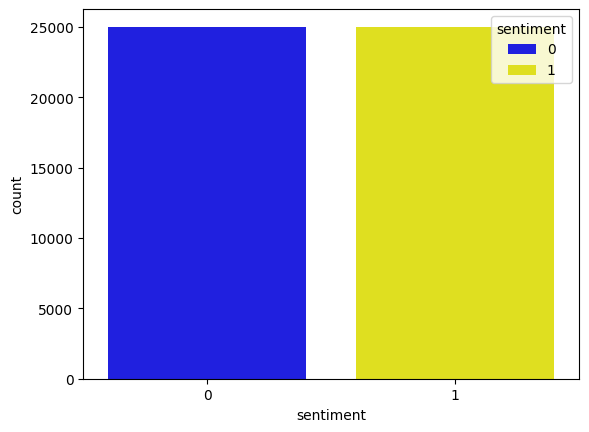

In [32]:
colors = ['blue', 'yellow']
sns.countplot(x = training_database['sentiment'], hue = training_database['sentiment'], palette=colors, legend=True);
# It's 50 thousand tweets, 25 thousand positive and 25 thousand negative.
# negative = blue, positive = yellow

In [33]:
# Deleting columns that won't be used, tweet_date and query_used
training_database.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [34]:
training_database.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


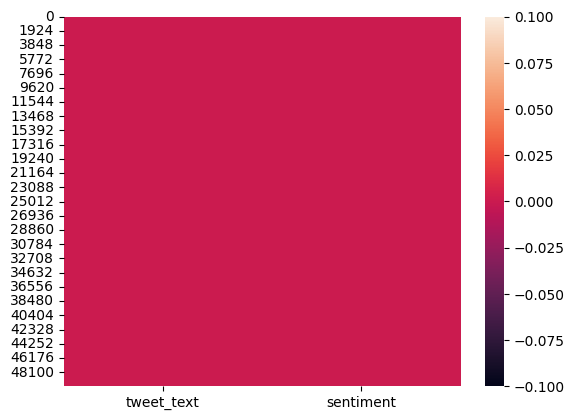

In [35]:
# Checking for null values
sns.heatmap(pd.isnull(training_database));

### Testing database

- Negative label: 0
- Positive label: 1

In [36]:
testing_database = pd.read_csv('../data/testing/testing_database.csv', delimiter=';')

In [37]:
testing_database.head(10)

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)
5,1029536620368863234,Precisa :) https://t.co/DcLGDHbjT0,Wed Aug 15 01:13:52 +0000 2018,1,:)
6,1029536626656129024,@Jeniabreu07 mas por acaso adoro beijos e abra...,Wed Aug 15 01:13:54 +0000 2018,1,:)
7,1029536638140141569,Solteiro s sozinho sempre :),Wed Aug 15 01:13:57 +0000 2018,1,:)
8,1029536643500462080,Lindezas Cortador kit Mário coleção Bia Cravol...,Wed Aug 15 01:13:58 +0000 2018,1,:)
9,1029536659388424192,@otphurts Claro que sim :)),Wed Aug 15 01:14:02 +0000 2018,1,:)


In [38]:
testing_database.shape

(5000, 5)

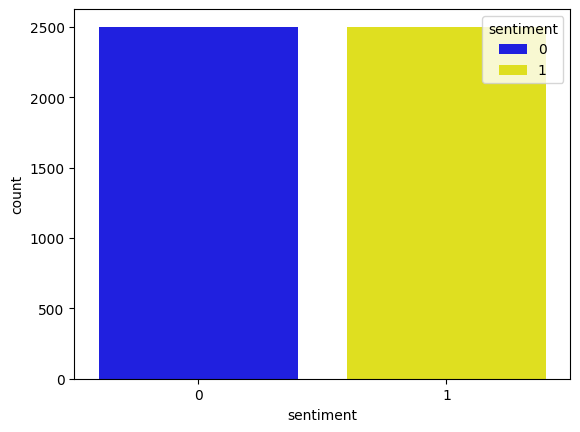

In [39]:
colors = ['blue', 'yellow']
sns.countplot(x = testing_database['sentiment'], hue = testing_database['sentiment'], palette=colors, legend=True);
# It's 5 thousand tweets, 2.5 thousand positive and 2.5 thousand negative.
# negative = blue, positive = yellow'

In [40]:
# Deleting columns that won't be used, tweet_date and query_used.
testing_database.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [41]:
testing_database.head(10)

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1
5,Precisa :) https://t.co/DcLGDHbjT0,1
6,@Jeniabreu07 mas por acaso adoro beijos e abra...,1
7,Solteiro s sozinho sempre :),1
8,Lindezas Cortador kit Mário coleção Bia Cravol...,1
9,@otphurts Claro que sim :)),1


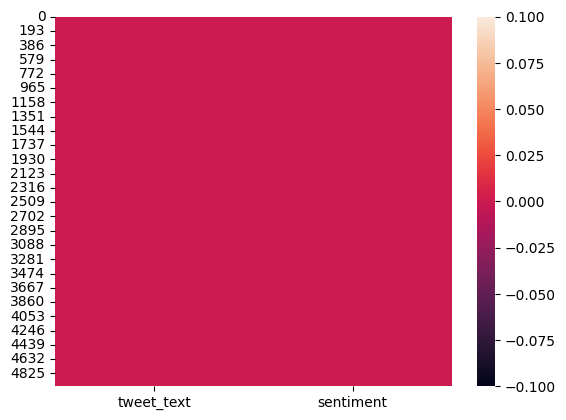

In [42]:
# Checking for null values
sns.heatmap(pd.isnull(testing_database));

## 3 Text preprocessing

- Lowercase letters
- Usernames (@)
- URLs
- empty spaces
- Emoticons
- Stop words
- Lemmatization
- Punctuation

In [43]:
nlp = spacy.load("pt_core_news_lg")
nlp

In [44]:
training_database['tweet_text'][0]

'@Laranjito76 A pessoa certa para isso seria o vale e azevedo :)'

In [20]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
print(stop_words)

{'fui', 'dar', 'nível', 'nossa', 'quem', 'diz', 'comprido', 'sexta', 'dezanove', 'desse', 'nos', 'vindo', 'além', 'dezassete', 'estado', 'custa', 'poderá', 'dezoito', 'deste', 'corrente', 'neste', 'daquele', 'nesta', 'quais', 'nove', 'da', 'apoia', 'foram', 'minhas', 'ele', 'pelas', 'teus', 'deve', 'perto', 'mil', 'assim', 'quero', 'nosso', 'vens', 'estiveram', 'eventual', 'vos', 'vem', 'era', 'aí', 'treze', 'são', 'agora', 'onde', 'aos', 'ademais', 'já', 'bem', 'quarto', 'teve', 'dá', 'naquele', 'você', 'final', 'também', 'quatro', 'ontem', 'máximo', 'tiveram', 'tão', 'fostes', 'faz', 'grupo', 'nós', 'tal', 'boa', 'devem', 'desde', 'por', 'ela', 'inclusive', 'para', 'sei', 'embora', 'longe', 'diante', 'zero', 'tem', 'vocês', 'contra', 'dizem', 'inicio', 'fazeis', 'novas', 'maior', 'estará', 'quinze', 'conselho', 'breve', 'nem', 'os', 'aquele', 'tu', 'irá', 'teu', 'dessa', 'toda', 'cada', 'porquanto', 'qualquer', 'às', 'as', 'outras', 'adeus', 'lhe', 'entre', 'último', 'demais', 'tive'

In [45]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def preprocessing(text):

  # lowercase
  text = text.lower()

  # username
  text = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', text)

  # urls
  text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)

  # empty spaces
  text = re.sub(r" +", ' ', text)

  # emoticons
  emotions_list = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emotion in emotions_list:
    text = text.replace(emotion, emotions_list[emotion])

  # lemmatization
  document = nlp(text)
  list = []
  for token in document:
    list.append(token.lemma_)

  # stopwords and punctuation
  list = [word for word in list if word not in stop_words and word not in string.punctuation]
  list = ' '.join([str(element) for element in list if not element.isdigit()])

  return list

In [47]:
text_test = '@behin_d_curtain :D Para :( mim, http://www.iaexpert.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
result = preprocessing(text_test)
result

'  emocaopositiva parir emocaonegativa mim precisamente contrário emocaopositiva vir chuva vir disposição emocaopositiva'

## 4 Pre-processing of the database

### Text cleaning

In [48]:
training_database.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [49]:
training_database['tweet_text'] = training_database['tweet_text'].apply(preprocessing)

In [50]:
training_database.head(10)

,tweet_text,sentiment
0,pessoa certo parir seriar valer azevedo emoc...,1
1,parir mim precisamente contrário emocaoposit...,1
2,video hoje ... pensar falar sobrar meter csgo ...,1
3,aaaaaaaa amar polaroids expressar quantum to a...,1
4,valorizar coração menino vc diferente sorrir ❤...,1
5,amigo to emocaopositiva,1
6,bravo jairo emocaopositiva,1
7,socorrer ksoaksosks achar to caixa som :p,1
8,gostar fazenda emocaopositiva morrer medo ga...,1
9,amanhar venom emocaopositiva,1


In [51]:
testing_database.head(10)

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1
5,Precisa :) https://t.co/DcLGDHbjT0,1
6,@Jeniabreu07 mas por acaso adoro beijos e abra...,1
7,Solteiro s sozinho sempre :),1
8,Lindezas Cortador kit Mário coleção Bia Cravol...,1
9,@otphurts Claro que sim :)),1


In [53]:
testing_database['tweet_text'] = testing_database['tweet_text'].apply(preprocessing)

In [54]:
testing_database.head(10)

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir lin...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé morrer sono chegar casar ficar sono e...,1
5,preciso emocaopositiva,1
6,acaso adorar beijo abraço hahahahaha bue fof...,1
7,solteiro s emocaopositiva,1
8,lindeza cortador kit mário coleção bia cravol ...,1
9,claro emocaopositiva,1


### Tratamento da classe

In [55]:
exemple_database = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                    ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [56]:
final_training_database = []

for text, emotion in zip(training_database['tweet_text'], training_database['sentiment']):
  if emotion == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif emotion == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})

  final_training_database.append([text, dic.copy()])

In [58]:
len(final_training_database)

50000

In [59]:
final_training_database[45000:45010]

[['menino pijama listrar filmar triste mundo estruturar nenhum pra assistir rever to pensar nisso emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['pra vídeo luísa raiz poliana infelizmente twitter tá ruim amanhã postar emocaonegativa asaventurasdepoliana099',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['to crise abstinência strangers emocaonegativa — tbm :/ to',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  esquecer olhar pra pagar mensalidade turma pro cursar querer emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['querer comer doce comer montar hoje emocaonegativa maldição',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['amigar emocaonegativa sacooooooooooooo deus medo vdd',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  affffffffff esquecer emocaonegativa nervosismo ta foder',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['chorar emocaonegativa “ amar “ tornar pro sentir querer proteger feliz algum formar vidar nado importar vidar',
  {'POSITIVO': False, 'NEGAT

## 5 Model creation

In [ ]:
twitter_model = spacy.blank('pt')

categories = twitter_model.create_pipe("textcat")
categories.add_label("POSITIVO")
categories.add_label("NEGATIVO")

twitter_model.add_pipe(categories)

history = []

In [33]:
twitter_model.begin_training()

for era in range(20):
  random.shuffle(final_training_database)
  losses = {}

  for batch in spacy.util.minibatch(final_training_database, 512):

    texts = [twitter_model(text) for text, entities in batch]
    annotations = [{'cats': entities} for text, entities in batch]

    twitter_model.update(texts, annotations, losses=losses)
    history.append(losses)

  if era % 5 == 0:
    print(losses)

{'textcat': 2.0689007767416e-05}
{'textcat': 1.9863372724068795e-07}
{'textcat': 1.219823800909653e-08}
{'textcat': 9.746512851351377e-10}


In [35]:
history_loss = []
for i in history:
  history_loss.append(i.get('textcat'))

history_loss = np.array(history_loss)
history_loss

array([2.06890078e-05, 2.06890078e-05, 2.06890078e-05, ...,
       5.61924317e-10, 5.61924317e-10, 5.61924317e-10])

Text(0, 0.5, 'Erro')

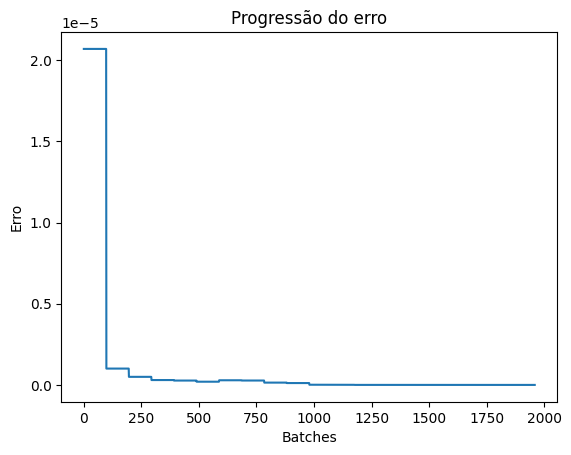

In [36]:
plt.plot(history_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [37]:
twitter_model.to_disk("../models/twitter_model")

## 6 Tests with a sentence

In [60]:
twitter_model = spacy.load('../models/twitter_model')
twitter_model

### Positive text

In [61]:
positive_text = testing_database['tweet_text'][21]
positive_text

'  ficar feliz q recíproco emocaopositiva'

In [62]:
prediction = twitter_model(positive_text)
prediction

  ficar feliz q recíproco emocaopositiva

In [63]:
prediction.cats

{'POSITIVO': 0.9999158382415771, 'NEGATIVO': 4.539786823443137e-05}

In [64]:
positive_text = 'eu gosto muito de você'
positive_text = preprocessing(positive_text)
positive_text

'gostar'

In [65]:
twitter_model(positive_text).cats

{'POSITIVO': 0.19201865792274475, 'NEGATIVO': 0.5292957425117493}

### Negative text

In [66]:
testing_database['tweet_text'][4000]

'tô triste filmar mulan mushu emocaonegativa'

In [67]:
negative_text = testing_database['tweet_text'][4000]
previsao = twitter_model(negative_text)
prediction.cats

{'POSITIVO': 0.9999158382415771, 'NEGATIVO': 4.539786823443137e-05}

## 7 Model evaluation

### Training set evaluation

In [68]:
predictions = []
for text in training_database['tweet_text']:
  prediction = twitter_model(text)
  predictions.append(prediction.cats)

predictions

[{'POSITIVO': 0.99989914894104, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9998506307601929, 'NEGATIVO': 5.190150477574207e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 5.554382732952945e-05},
 {'POSITIVO': 0.9999336004257202, 'NEGATIVO': 6.595798186026514e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9997230172157288, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9998440742492676, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 5.846551721333526e-05},
 {'POSITIVO': 0.9999003410339355, 'NEGATIVO': 5.560557474382222e-05},
 {'POSITIVO': 0.9996211528778076, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9999315738677979, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9999427795410156, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.999915599822998, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9997450709342957, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9999545

In [69]:
final_predictions = []
for prediction in predictions:
  if prediction['POSITIVO'] > prediction['NEGATIVO']:
    final_predictions.append(1)
  else:
    final_predictions.append(0)

final_predictions = np.array(final_predictions)

final_predictions

array([1, 1, 1, ..., 0, 0, 0])

In [70]:
real_responses = training_database['sentiment'].values
real_responses

array([1, 1, 1, ..., 0, 0, 0])

In [71]:

accuracy_score(real_responses, final_predictions)

1.0

In [72]:
cm = confusion_matrix(real_responses, final_predictions)
cm

array([[25000,     0],
       [    0, 25000]])

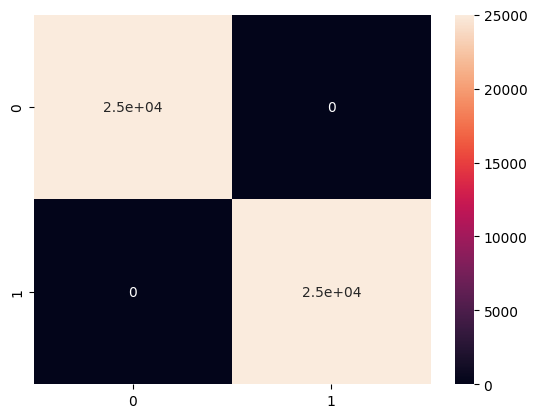

In [73]:
sns.heatmap(cm, annot=True);

### Testing set evaluation

In [74]:
predictions = []
for text in testing_database['tweet_text']:
  prediction = twitter_model(text)
  predictions.append(prediction.cats)

In [75]:
final_predictions = []
for prediction in predictions:
  if prediction['POSITIVO'] > prediction['NEGATIVO']:
    final_predictions.append(1)
  else:
    final_predictions.append(0)

final_predictions = np.array(final_predictions)

In [76]:
real_responses = testing_database['sentiment'].values

In [77]:
accuracy_score(real_responses, final_predictions)

0.998

In [78]:
cm = confusion_matrix(real_responses, final_predictions)
cm

array([[2497,    3],
       [   7, 2493]])

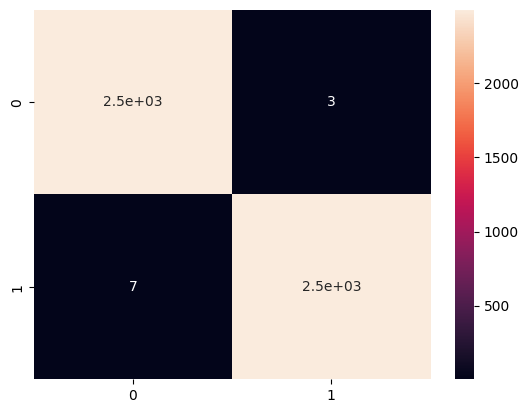

In [79]:
sns.heatmap(cm, annot=True);